## Netflix Movie Analysis
dataset from https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
df = pd.read_csv('../data_analysis/netflix/netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Clean data

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')
# df['release_year'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Analyze Movie vs TV Show Count
More than 6000 movies vs less than 3000 TV shows

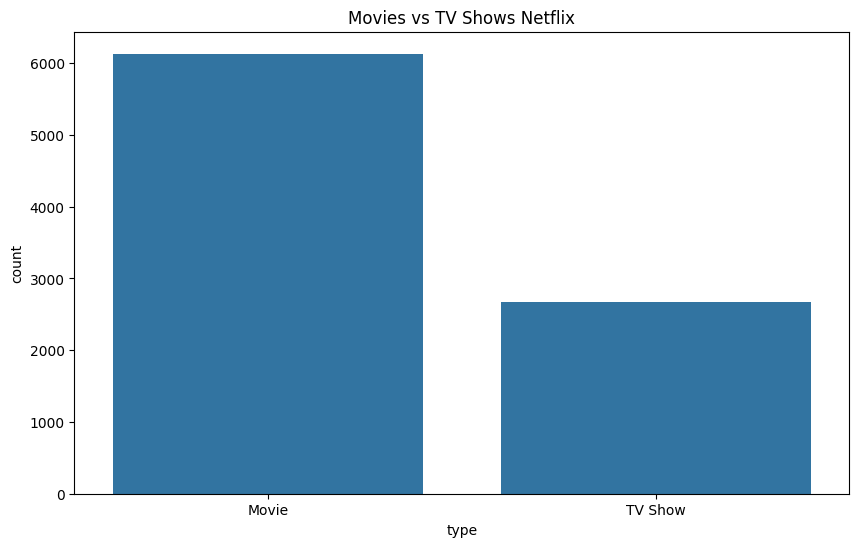

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'type')
plt.title("Movies vs TV Shows Netflix")
plt.show()

## Top Genres

In [5]:
df['listed_in'] = df['listed_in'].str.split(", ")
genres_exploded = df.explode('listed_in')

top_genres = genres_exploded['listed_in'].value_counts().head(10)
print(top_genres)

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


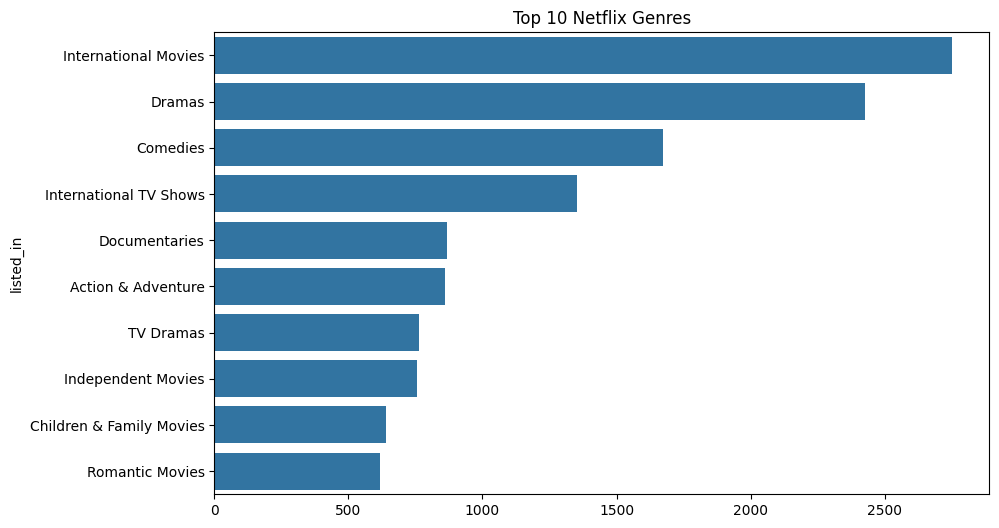

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Netflix Genres')
plt.show()

## Yearly Titles Added
The number of titles started to increase after 2000, however taking a steep decrease in 2020, most likely due to the pandemic

In [7]:
yearly_counts = df.groupby('release_year')['show_id'].count().sort_index()
print(yearly_counts)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: show_id, Length: 74, dtype: int64


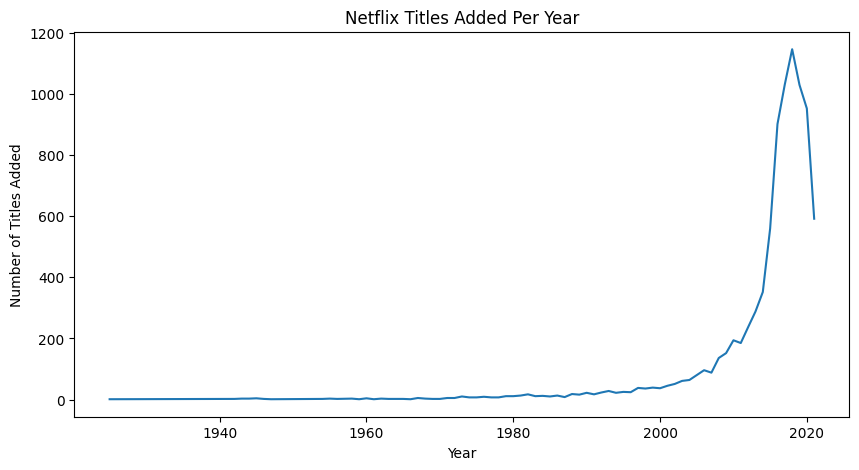

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Netflix Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

## Top 10 Countries on Netflix

In [9]:
df['country'] = df['country'].str.split(", ")
countries_exploded = df.explode('country')

top_countries = countries_exploded['country'].value_counts().head(10)
print(top_countries)


country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


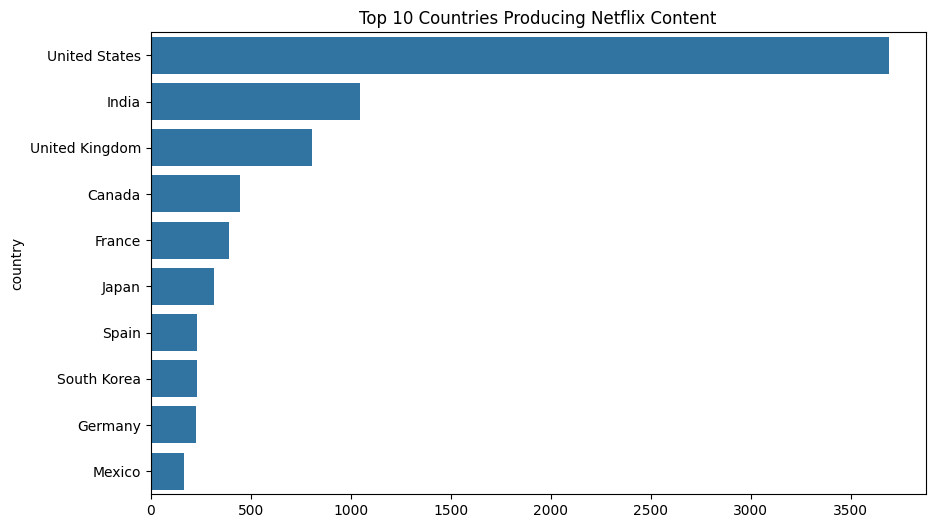

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Netflix Content')
plt.show()